In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Clustering methods
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

#Libraries for Silhouette score, Calinski-Harabasz and Dunn Index
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

##### In this project we are implementing different clustering methods  and validating them using external and internal validation techniques

## External Validation Metrics

#### 1) Adjusted Rand Index (ARI)

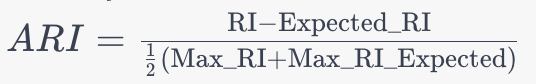

**RI** is the actual count of pairs of samples that are assigned to the same or different clusters.

**Expected_RI** is the expected count of RI under random conditions.

**Max_RI** is the maximum possible value of RI.

**Max_RI_Expected** is the expected maximum RI under random conditions.

The ARI measures the similarity between two data partitions by comparing the actual count of pairs of samples assigned to the same or different clusters to the expected count under random conditions. ARI values range from -1 to 1,                                                                                                                                                                       where 1 indicates complete agreement,
0 indicates random assignment, 
and -1 indicates complete disagreement.

#### 2) Normalized Mutual Information (NMI)

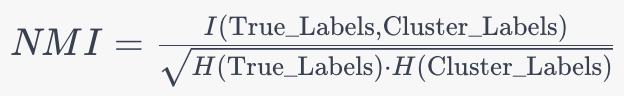

**I(True_Labels,Cluster_Labels)** is the mutual information.

**H(True_Labels)** and **H(Cluster_Labels)** are the entropies of the true labels and cluster labels, respectively

NMI measures the similarity between two data partitions by comparing their mutual information and the entropies of the true labels and cluster labels. NMI values range from 0 to 1, where 1 indicates complete agreement and 0 indicates complete disagreement.

#### 3) Fowlkes-Mallows Index (FMI)

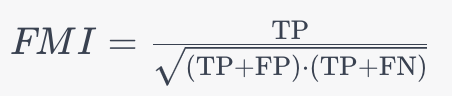

**TP** is the number of true positive pairs.

**FP** is the number of false positive pairs.

**FN** is the number of false negative pairs.

FMI measures the similarity between two data partitions by comparing the number of true positive pairs to the expected number of positive pairs. FMI values range from 0 to 1, where 1 indicates complete agreement.

## Internal Validation Metrics

#### 1) Silhouette Coefficient

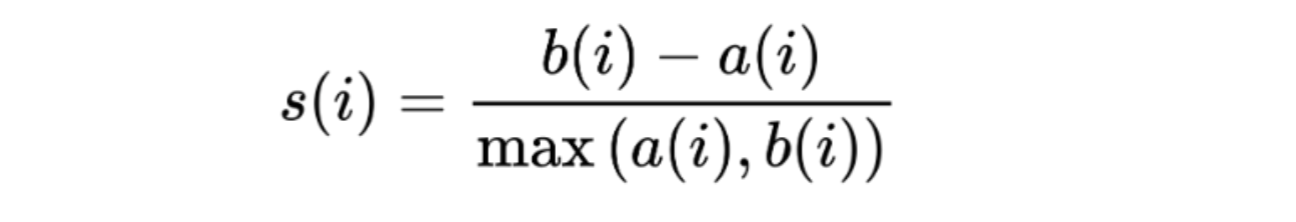

**a(i)** is the average distance between a sample and all other points inside a cluster 

**b(i)** is the average distance between a sample and all other points in the next nearest cluster 

**max(a(i),b(i))** is the maximum value of either a(i) or b(i).

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The Silhouette score ranges from -1 to 1, with 
Silhouette score of 1 representing better clustering. 
Silhouette score of 0 indicates overlapping clusters.
Silhouette score of -1 indicates samples might have been assigned to the wrong cluster.

#### 2) Calinski-Harabasz index

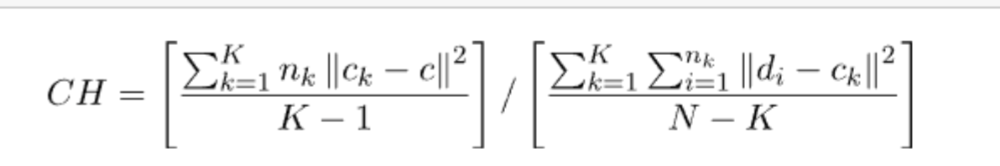

**nk** is the number of points of the kth cluster

**ck** is the centroid of the kth cluster

**c** is the global centroid

**N** is the total no. of data points

**K** is the number of clusters

**d** is the points on a dataset D =[ d1 , d2 , d3 , … dN ]

The CH Index is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Cohesion is estimated based on the distances from the data points in a cluster to its cluster centroid and Separation is based on the distance of the cluster centroids from the global centroid.

Although there is no “acceptable” cut-off value
a higher value of CH index means the clusters are dense and well separated.

#### 3) Davies-Bouldin Index

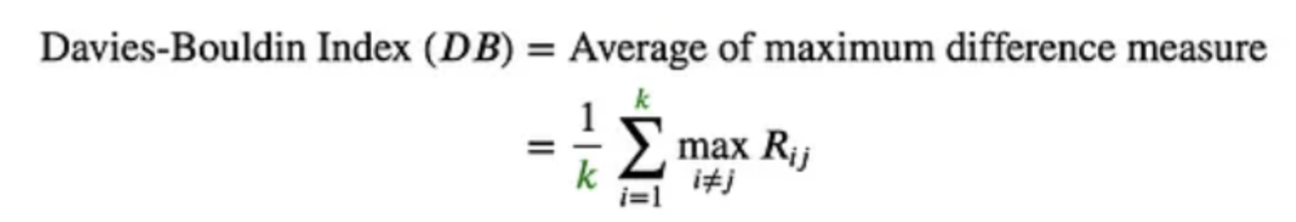

**k** is the number of clusters

**Rij** is the difference measure; (average within cluster distance)/(between cluster distance) = (si + sj)/dij

**si** is the average distance between each point in cluster i to cluster center ci

**c** distance between cluster centers ci and cj


The Davies-Bouldin Index measures the average similarity between clusters; where it compares the size of clusters against the average distance between clusters.

A lower score means that the cluster is relatively small compared to the distance to another cluster, hence well-defined

# Task 1: 
Datasets posted with the project (“Data1.csv”, “Data2.csv”, “Data3.csv”, “Data4.csv”,
“Data5.csv”) contain the data points and their respective class information. For each of the 5
datasets, follow the steps below:
1. Use K-means and hierarchical clustering methods to generate clusters.
2. Evaluate the performance of the clustering algorithm using external validation metrics.
3. Plot (2D or 3D) the data points for each dataset and color them according to the original
class
4. Plot (2D or 3D) the data points for each dataset and color them according to the class
allocated by each clustering algorithm

##### LOADING DATA

In [2]:
#loading the data
f1 = r'/Users/gauravnathani/Downloads/Data1.csv'
df1 = pd.read_csv(f1, low_memory=False)

f2 = r'/Users/gauravnathani/Downloads/Data2.csv'
df2 = pd.read_csv(f2, low_memory=False)

f3 = r'/Users/gauravnathani/Downloads/Data3.csv'
df3 = pd.read_csv(f3, low_memory=False)

f4 = r'/Users/gauravnathani/Downloads/Data4.csv'
df4 = pd.read_csv(f4, low_memory=False)

f5 = r'/Users/gauravnathani/Downloads/Data5.csv'
df5 = pd.read_csv(f5, low_memory=False)

f6 = r'/Users/gauravnathani/Downloads/World Indicators.csv'
df6 = pd.read_csv(f6, low_memory=False)

##### CHECKING DATA FOR MISSING VALUES AND DATA STRUCTURE

In [3]:
# checking data
display(df1.head())
display(df1.info())

display(df2.head())
display(df2.info())

display(df3.head())
display(df3.info())

display(df4.head())
display(df4.info())

display(df5.head())
display(df5.info())

Unnamed: 0         X1         X2         X3  Class
0           1  -4.822490 -50.402170   4.020861      1
1           2 -44.460120  20.964670 -11.492060      1
2           3  50.001020   0.780748   9.134460      1
3           4 -41.699080 -22.310060  16.314120      1
4           5   4.425242  -4.666664  50.223740      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  800 non-null    int64  
 1   X1          800 non-null    float64
 2   X2          800 non-null    float64
 3   X3          800 non-null    float64
 4   Class       800 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 31.4 KB


None

Unnamed: 0      X1     X2       X3  Class
0           1 -0.4530 -0.891  0.02300      1
1           2  0.6530 -0.846  0.02110      1
2           3  0.3980  0.913 -0.00139      1
3           4  0.0952  1.050  0.00628      1
4           5  0.5240 -0.941  0.03780      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   X1          1000 non-null   float64
 2   X2          1000 non-null   float64
 3   X3          1000 non-null   float64
 4   Class       1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


None

Unnamed: 0        X1        X2        X3  Class
0           1  1.295428  0.050829 -0.385217      1
1           2  1.409178 -0.035191 -0.251980      1
2           3  1.096803  0.246365 -0.415011      1
3           4  1.463328  0.265354 -0.513488      1
4           5  1.603284  0.080577 -0.470257      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   X1          400 non-null    float64
 2   X2          400 non-null    float64
 3   X3          400 non-null    float64
 4   Class       400 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 15.8 KB


None

Unnamed: 0         X         Y         C  Class
0         X1  3.277701  0.814082  0.326574      1
1         X2  0.387577  0.176780  0.888046      1
2         X3  0.268546  0.582963  0.080981      1
3         X4  2.031145  0.244597  0.643921      1
4         X5  0.188677  0.461280  0.496633      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  404 non-null    object 
 1   X           404 non-null    float64
 2   Y           404 non-null    float64
 3   C           404 non-null    float64
 4   Class       404 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 15.9+ KB


None

Unnamed: 0        X1        X2        X3  Class
0           1 -0.063274  0.027734  0.022683      1
1           2 -0.000731  0.048211  0.069198      1
2           3 -0.060767 -0.009080  0.053085      1
3           4  0.013252 -0.011876  0.055324      1
4           5 -0.054508 -0.003813  0.001738      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  212 non-null    int64  
 1   X1          212 non-null    float64
 2   X2          212 non-null    float64
 3   X3          212 non-null    float64
 4   Class       212 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 8.4 KB


None

##### CHANGING DATATYPE OF CLASS COLUMN TO STRING

In [4]:
#changing data type of Class column to string
df1['Class'] = df1['Class'].astype(str)
df1['Class'] = df1['Class'].astype(str)
df1['Class'] = df1['Class'].astype(str)
df1['Class'] = df1['Class'].astype(str)
df1['Class'] = df1['Class'].astype(str)

##### The primary purpose of using StandardScaler is to ensure that all features have the same scale. Standardization is particularly important for algorithms that rely on distance metrics, such as k-nearest neighbors or k-means clustering, as these algorithms are sensitive to the scale of the input features.

In [5]:
#Using this to scale and fit data for Kmeans
scaler = StandardScaler()

##### DEFINING FUNCTION TO PLOT ELBOW, SILHOUETTE SCORE AND CH SCORE

In [6]:
#defining common function to get Kmeans and plot Elbow, Silhouette Score and CH Score
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    silhouettes = []
    ch_coeffs = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        if k > 1:
            silhouettes.append(metrics.silhouette_score(data, kmeans.labels_))
            ch_coeffs.append(metrics.calinski_harabasz_score(data, kmeans.labels_))
        means.append(k)
        inertias.append(kmeans.inertia_)
        

    plt.plot(means, inertias)
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.show()
    
    plt.figure(figsize=(8,5))
    plt.plot(range(2,11), silhouettes)
    plt.xlabel("K (number of clusters)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Plot")
    plt.show()
    
    plt.figure(figsize=(8,5))
    plt.plot(range(2,11), ch_coeffs)
    plt.xlabel("K (number of clusters)")
    plt.ylabel("CH Score")
    plt.title("CH Plot")
    plt.show()
    


##### DEFINING FUNCTION TO PLOT DENDOGRAM

In [7]:
## This is just a plotting function

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Data1 analysis

##### Plotting  the data points for  dataset and colored them according to the original class

In [8]:
#Plotting a 3D scatter plot
fig = px.scatter_3d(df1, x='X1', y='X2', z='X3', color='Class')
fig.show()

# KMeans

##### For Data1 plotting Elbow, Silhouette score and CH score plots to find K

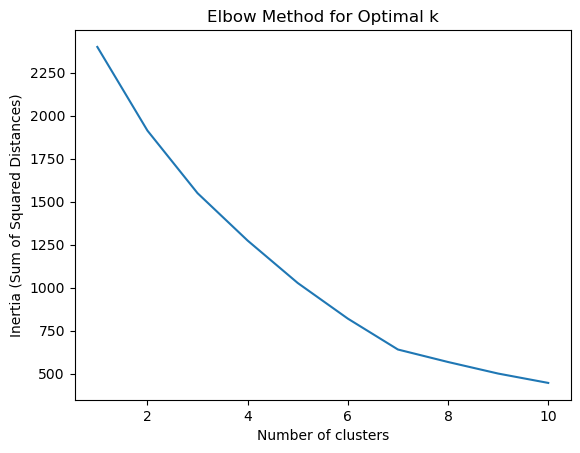

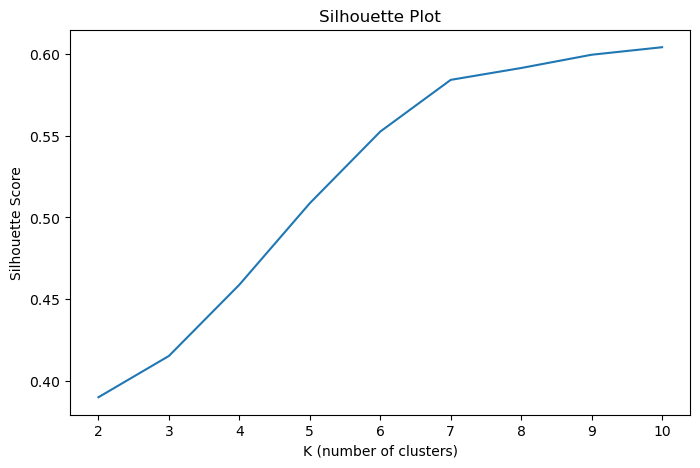

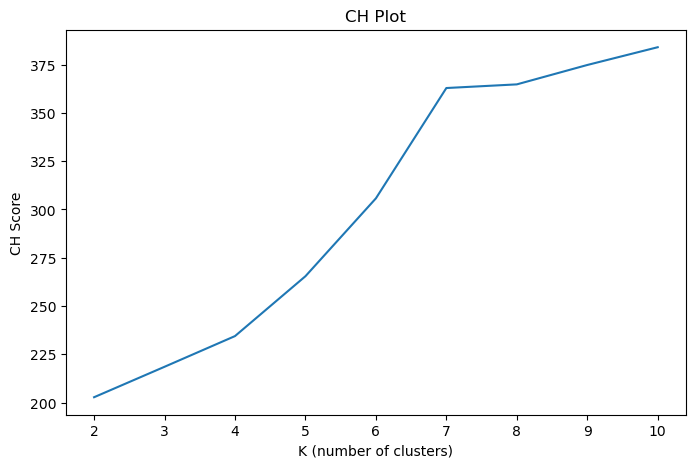

In [9]:
#fitting data to find kMeans
df1[['X1_T', 'X2_T', 'X3_T']] = scaler.fit_transform(df1[['X1', 'X2', 'X3']])
optimize_k_means(df1[['X1_T', 'X2_T', 'X3_T']], 11)

Looking at the Elbow plot we can see K=7. This can be verified from Silhouette score and CH score plots because 1st peak occurs at K=7.

After k=7 elbow plot flattens out. So, we will choose k=7.

##### Creating KMean Model and plotting the data points for each dataset and color them according to the class allocated by each clustering algorithm

In [10]:
# Create and fit the K-means model
kmeans = KMeans(n_clusters = 7)
kmeans.fit(df1[['X1_T', 'X2_T', 'X3_T']])

# Get cluster labels
df1['kmeans_7'] = kmeans.labels_
df1['kmeans_7'] = df1['kmeans_7'].astype(str)

#displaying the data
print(df1)

# Visualize the clusters
fig = px.scatter_3d(df1, x='X1_T', y='X2_T', z='X3_T', color='kmeans_7')
fig.show()

# Print the SSE
print('SSE Data1: '+ str(kmeans.inertia_))

     Unnamed: 0         X1         X2         X3 Class      X1_T      X2_T  \
0             1  -4.822490 -50.402170   4.020861     1 -0.224462 -2.680314   
1             2 -44.460120  20.964670 -11.492060     1 -2.337375  1.185586   
2             3  50.001020   0.780748   9.134460     1  2.697945  0.092235   
3             4 -41.699080 -22.310060  16.314120     1 -2.190196 -1.158581   
4             5   4.425242  -4.666664  50.223740     1  0.268495 -0.202848   
..          ...        ...        ...        ...   ...       ...       ...   
795         796  -1.531027   0.681636   0.543271     2 -0.049009  0.086866   
796         797   0.500754  -1.848209   0.605654     2  0.059297 -0.050174   
797         798   1.089574  -0.246493  -3.355758     2  0.090684  0.036590   
798         799  -1.907717   4.964502   2.098423     2 -0.069088  0.318866   
799         800   3.415463   4.529521  -1.617736     2  0.214668  0.295304   

         X3_T kmeans_7  
0    0.133595        4  
1   -0.514761

SSE Data1: 640.7980354123188


##### Evaluating the performance of the clustering algorithm using external validation metrics

In [11]:
#Calculating the external validation metrics ari,nmi & fmi scores
ari_score = adjusted_rand_score(df1['Class'], df1['kmeans_7'])
nmi_score = normalized_mutual_info_score(df1['Class'], df1['kmeans_7'])
fmi_score = fowlkes_mallows_score(df1['Class'], df1['kmeans_7'])

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score}")

Adjusted Rand Index (ARI): 0.5844328834882186
Normalized Mutual Information (NMI): 0.608885986664943
Fowlkes-Mallows Index (FMI): 0.764283371977766


# Hierarchical Clustering

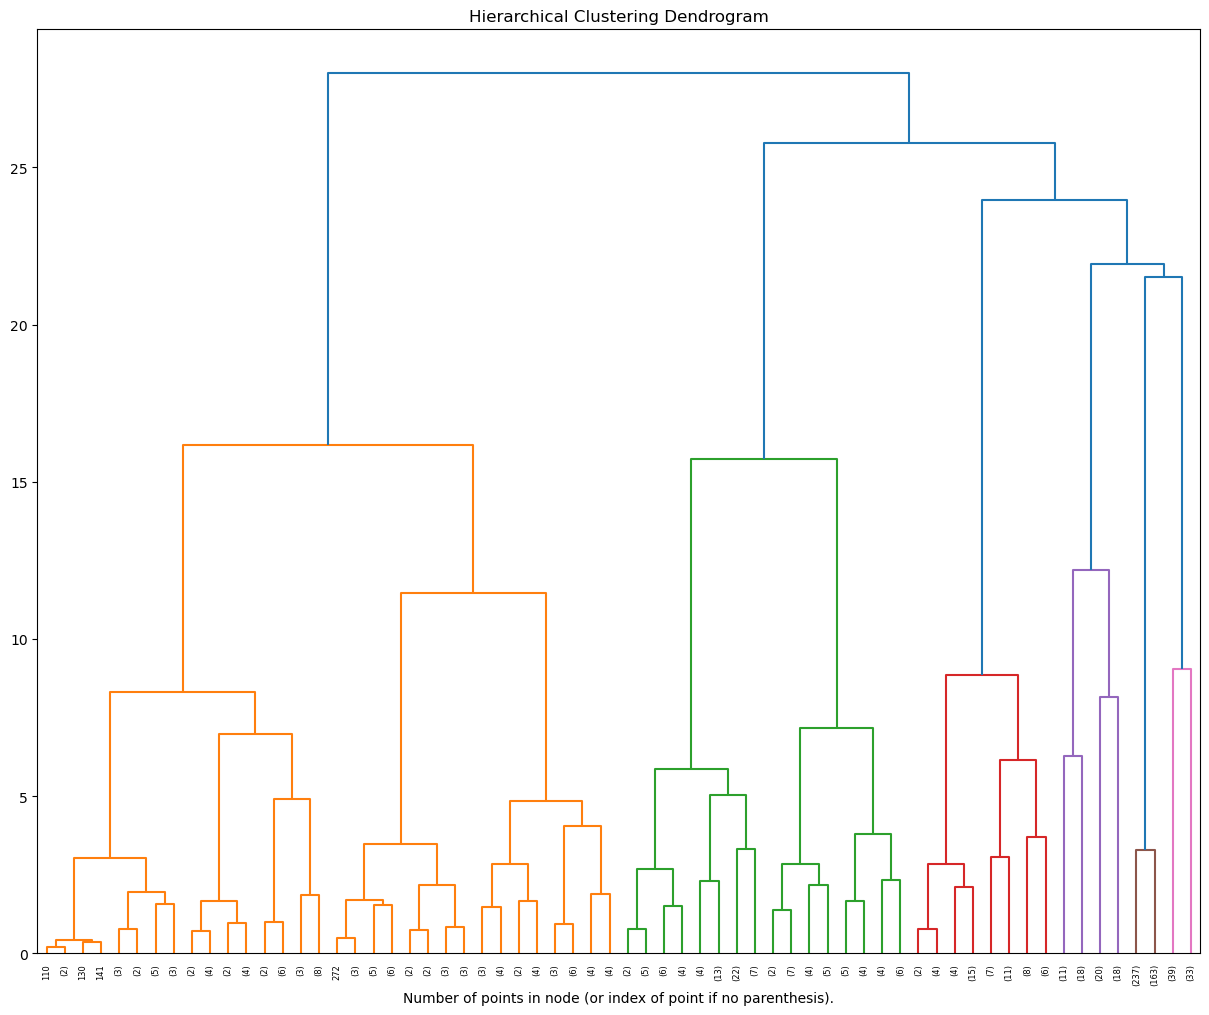

In [12]:
# Setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)


model = model.fit(df1[['X1_T', 'X2_T', 'X3_T']])
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")

# plot the top Five levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

we can see a huge decrease in the distance metric when going from cluster 1 to 6. In this data for Hirerarchical clustering we are setting the cluster number to 6.

##### Creating Hierarchical Model and plotting the data points for each dataset and color them according to the class allocated by each clustering algorithm

In [13]:


# Create and fit the hierarchical clustering model
hierarchical_data_1 = AgglomerativeClustering(n_clusters=6)

# Get cluster labels
df1['Cluster_hierarchical'] = hierarchical_data_1.fit_predict(df1[['X1_T', 'X2_T', 'X3_T']])
df1['Cluster_hierarchical'] = df1['Cluster_hierarchical'].astype(str)

print(df1)

# Visualizing the clusters
fig = px.scatter_3d(df1, x='X1_T', y='X2_T', z='X3_T', color='Cluster_hierarchical')
fig.update_layout(title='Data 1 Cluster Hierarchical')
fig.show()




     Unnamed: 0         X1         X2         X3 Class      X1_T      X2_T  \
0             1  -4.822490 -50.402170   4.020861     1 -0.224462 -2.680314   
1             2 -44.460120  20.964670 -11.492060     1 -2.337375  1.185586   
2             3  50.001020   0.780748   9.134460     1  2.697945  0.092235   
3             4 -41.699080 -22.310060  16.314120     1 -2.190196 -1.158581   
4             5   4.425242  -4.666664  50.223740     1  0.268495 -0.202848   
..          ...        ...        ...        ...   ...       ...       ...   
795         796  -1.531027   0.681636   0.543271     2 -0.049009  0.086866   
796         797   0.500754  -1.848209   0.605654     2  0.059297 -0.050174   
797         798   1.089574  -0.246493  -3.355758     2  0.090684  0.036590   
798         799  -1.907717   4.964502   2.098423     2 -0.069088  0.318866   
799         800   3.415463   4.529521  -1.617736     2  0.214668  0.295304   

         X3_T kmeans_7 Cluster_hierarchical  
0    0.133595    

##### Evaluating the performance of the clustering algorithm using external validation metrics

In [14]:
#Calculating the external validation metrics ari,nmi & fmi scores
ari_score = adjusted_rand_score(df1['Class'], df1['Cluster_hierarchical'])
nmi_score = normalized_mutual_info_score(df1['Class'], df1['Cluster_hierarchical'])
fmi_score = fowlkes_mallows_score(df1['Class'], df1['Cluster_hierarchical'])

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score}")


Adjusted Rand Index (ARI): 0.6047413684784886
Normalized Mutual Information (NMI): 0.6366451805037963
Fowlkes-Mallows Index (FMI): 0.7774589094542066


# CONCLUSION DATA 1 :

##### KMeans
Adjusted Rand Index (ARI): 0.5844328834882186

Normalized Mutual Information (NMI): 0.6088859866649429

Fowlkes-Mallows Index (FMI): 0.764283371977766

##### Hierarchical Clustering
Adjusted Rand Index (ARI): 0.6047413684784886

Normalized Mutual Information (NMI): 0.6366451805037963

Fowlkes-Mallows Index (FMI): 0.7774589094542066

According to the external validation metrics scores, we can conclude that hierarchical clustering is performing better than K-Means.

# Data2 analysis

##### Plotting  the data points for  dataset and colored them according to the original class

In [15]:
#Plotting a 3D scatter plot
fig = px.scatter_3d(df2, x='X1', y='X2', z='X3', color='Class')
fig.show()

# KMeans

##### For Data2 plotting Elbow, Silhouette score and CH score plots to find K

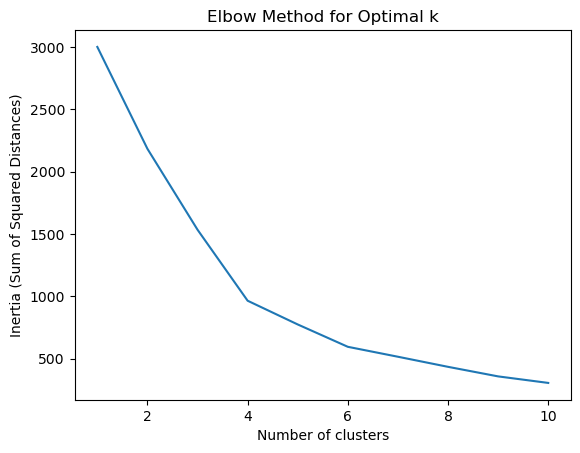

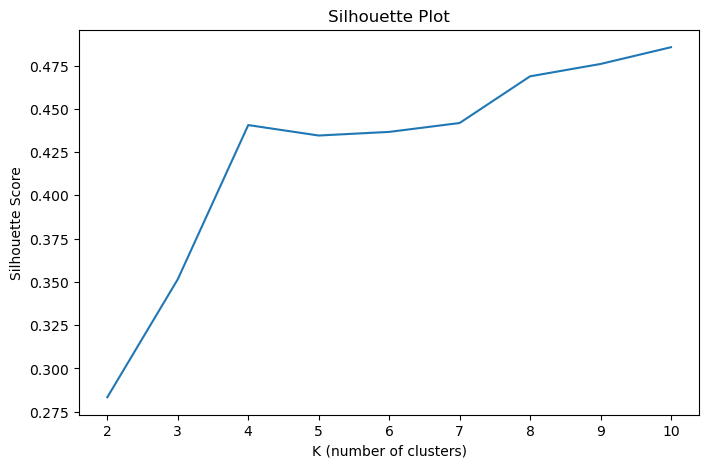

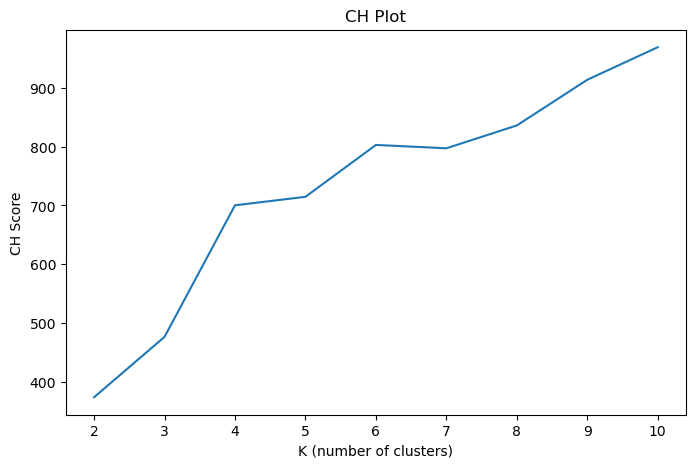

In [16]:
#fitting data to find kMeans
df2[['X1_T', 'X2_T', 'X3_T']] = scaler.fit_transform(df2[['X1', 'X2', 'X3']])
optimize_k_means(df2[['X1_T', 'X2_T', 'X3_T']], 11)

Looking at the Elbow plot we can see K=4. This can be verified from Silhouette score and CH score plot because first peak occurs at 4. After that we can more peaks in both the plots.

Plot flattens out after k = 4 in elbow plot. So, we will choose k=4.

##### Creating KMean Model and plotting the data points for each dataset and color them according to the class allocated by each clustering algorithm

In [17]:
# Create and fit the K-means model
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df2[['X1_T', 'X2_T', 'X3_T']])

# Get cluster labels
df2['kmeans_4'] = kmeans.labels_
df2['kmeans_4'] = df2['kmeans_4'].astype(str)

#displaying the data
print(df2)

# Visualize the clusters
fig = px.scatter_3d(df2, x='X1_T', y='X2_T', z='X3_T', color='kmeans_4')
fig.show()

# Print the SSE
print('SSE Data2: '+ str(kmeans.inertia_))



     Unnamed: 0       X1      X2       X3  Class      X1_T      X2_T  \
0             1 -0.45300 -0.8910  0.02300      1 -0.908199 -1.509643   
1             2  0.65300 -0.8460  0.02110      1  1.348445 -1.458211   
2             3  0.39800  0.9130 -0.00139      1  0.828152  0.552221   
3             4  0.09520  1.0500  0.00628      1  0.210329  0.708804   
4             5  0.52400 -0.9410  0.03780      1  1.085238 -1.566790   
..          ...      ...     ...      ...    ...       ...       ...   
995         996  0.01520  0.0531 -0.36100      2  0.047100 -0.430593   
996         997  0.05160  0.6910  0.87500      2  0.121369  0.298488   
997         998 -0.00511  1.3900 -0.94700      2  0.005660  1.097403   
998         999 -0.06710  0.7140  0.88100      2 -0.120822  0.324776   
999        1000 -0.05770  0.4280 -0.73000      2 -0.101643 -0.002105   

         X3_T kmeans_4  
0    0.063015        1  
1    0.059138        3  
2    0.013250        3  
3    0.028900        0  
4    0.093

SSE Data2: 964.854501495821


##### Evaluating the performance of the clustering algorithm using external validation metrics

In [18]:
#Calculating the external validation metrics ari,nmi & fmi scores
ari_score = adjusted_rand_score(df2['Class'], df2['kmeans_4'])
nmi_score = normalized_mutual_info_score(df2['Class'], df2['kmeans_4'])
fmi_score = fowlkes_mallows_score(df2['Class'], df2['kmeans_4'])

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score}")

Adjusted Rand Index (ARI): 0.319436855936948
Normalized Mutual Information (NMI): 0.41267722383362937
Fowlkes-Mallows Index (FMI): 0.5803334094834122


# Hierarchical Clustering

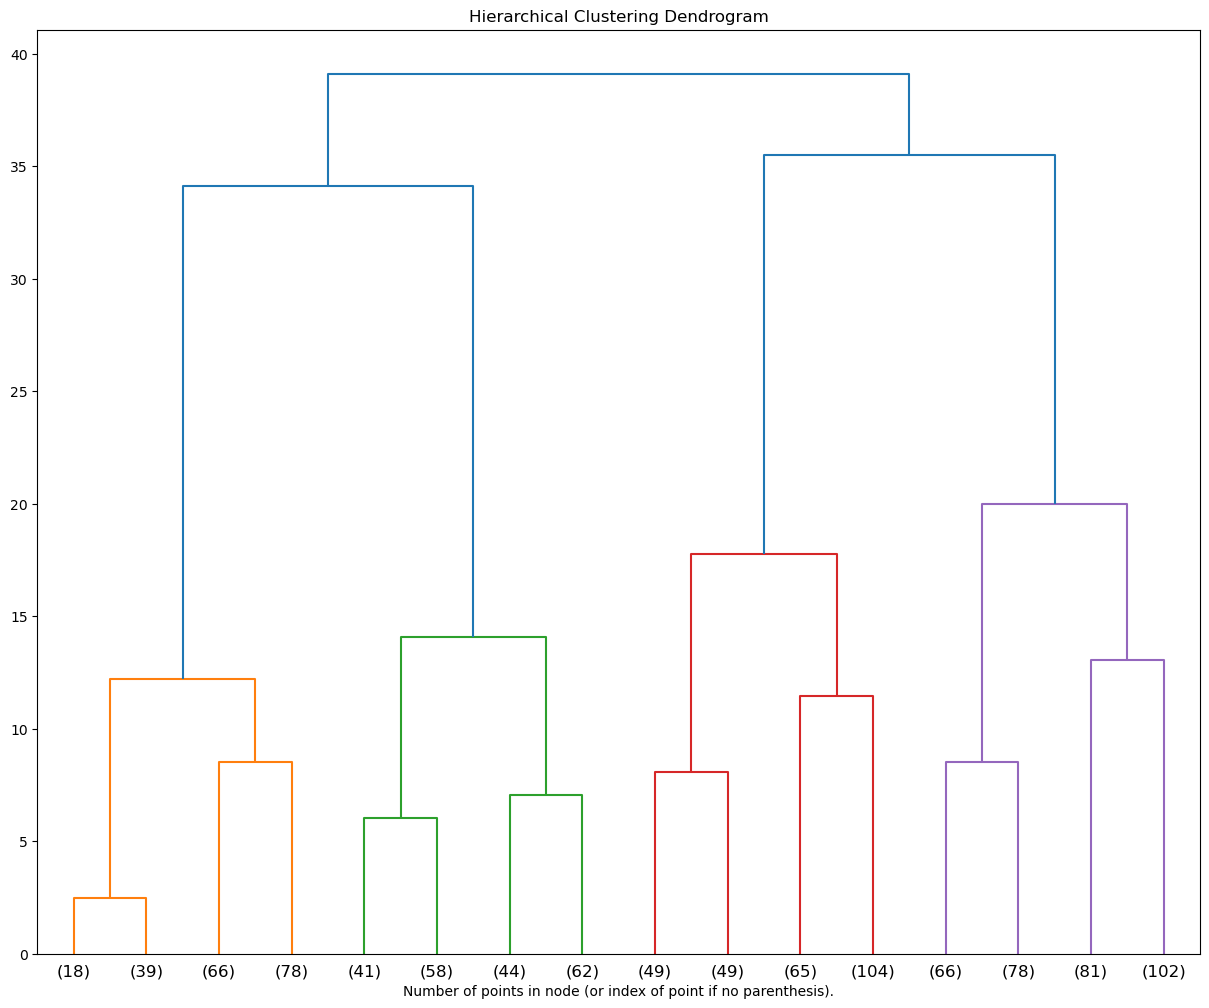

In [19]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)


model = model.fit(df2[['X1_T', 'X2_T', 'X3_T']])
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

we can see a huge decrease in the distance metric when going from cluster 1 to 4. 
In this data for Hirerarchical clustering we are setting the cluster number to 4.

##### Creating Hierarchical Model and plotting the data points for each dataset and color them according to the class allocated by each clustering algorithm

In [20]:
# Create and fit the hierarchical clustering model
hierarchical_data_2 = AgglomerativeClustering(n_clusters=4)

# Get cluster labels
df2['Cluster_hierarchical'] = hierarchical_data_2.fit_predict(df2[['X1_T', 'X2_T', 'X3_T']])
df2['Cluster_hierarchical'] = df2['Cluster_hierarchical'].astype(str)

print(df2)

# Visualizing the clusters
fig = px.scatter_3d(df2, x='X1_T', y='X2_T', z='X3_T', color='Cluster_hierarchical')
fig.update_layout(title='Data 2 Cluster Hierarchical')
fig.show()


     Unnamed: 0       X1      X2       X3  Class      X1_T      X2_T  \
0             1 -0.45300 -0.8910  0.02300      1 -0.908199 -1.509643   
1             2  0.65300 -0.8460  0.02110      1  1.348445 -1.458211   
2             3  0.39800  0.9130 -0.00139      1  0.828152  0.552221   
3             4  0.09520  1.0500  0.00628      1  0.210329  0.708804   
4             5  0.52400 -0.9410  0.03780      1  1.085238 -1.566790   
..          ...      ...     ...      ...    ...       ...       ...   
995         996  0.01520  0.0531 -0.36100      2  0.047100 -0.430593   
996         997  0.05160  0.6910  0.87500      2  0.121369  0.298488   
997         998 -0.00511  1.3900 -0.94700      2  0.005660  1.097403   
998         999 -0.06710  0.7140  0.88100      2 -0.120822  0.324776   
999        1000 -0.05770  0.4280 -0.73000      2 -0.101643 -0.002105   

         X3_T kmeans_4 Cluster_hierarchical  
0    0.063015        1                    3  
1    0.059138        3                    2

##### Evaluating the performance of the clustering algorithm using external validation metrics

In [21]:
#Calculating the external validation metrics ari,nmi & fmi scores
ari_score = adjusted_rand_score(df2['Class'], df2['Cluster_hierarchical'])
nmi_score = normalized_mutual_info_score(df2['Class'], df2['Cluster_hierarchical'])
fmi_score = fowlkes_mallows_score(df2['Class'], df2['Cluster_hierarchical'])

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score}")


Adjusted Rand Index (ARI): 0.2753513807717355
Normalized Mutual Information (NMI): 0.3719170714275346
Fowlkes-Mallows Index (FMI): 0.5512689563106861


# CONCLUSION DATA 2 :

##### KMeans
Adjusted Rand Index (ARI): 0.319436855936948

Normalized Mutual Information (NMI): 0.41267722383362937

Fowlkes-Mallows Index (FMI): 0.5803334094834122

##### Hierarchical Clustering
Adjusted Rand Index (ARI): 0.2753513807717355

Normalized Mutual Information (NMI): 0.3719170714275346

Fowlkes-Mallows Index (FMI): 0.5512689563106861

According to the external validation metrics scores, we can conclude that KMeans clustering is little better than Hierarchical Clustering.

# Data3 analysis

##### Plotting  the data points for  dataset and colored them according to the original class

In [22]:
#Plotting a 3D scatter plot
fig = px.scatter_3d(df3, x='X1', y='X2', z='X3', color='Class')
fig.show()

# KMeans

##### For Data3 plotting Elbow, Silhouette score and CH score plots to find K

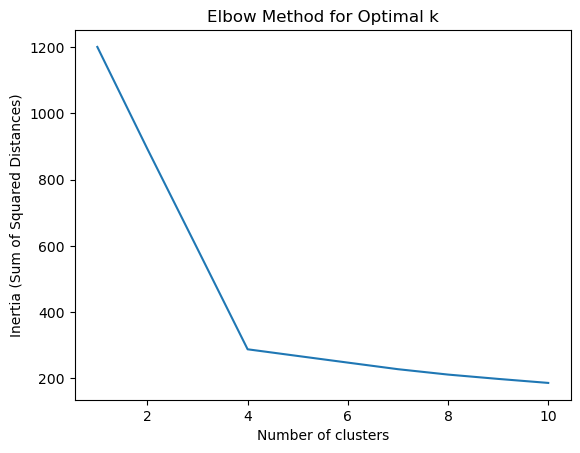

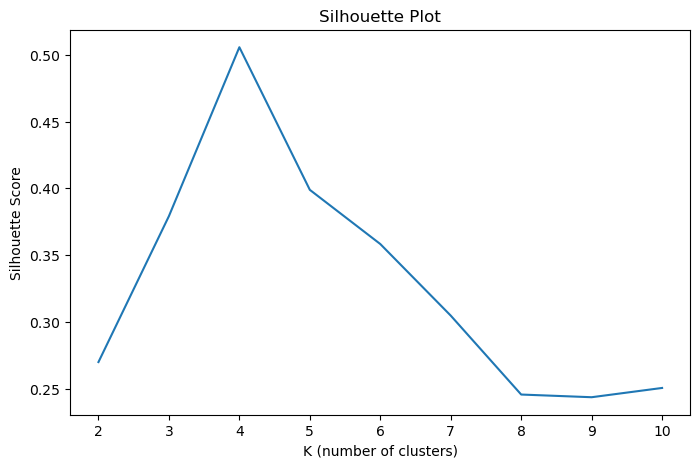

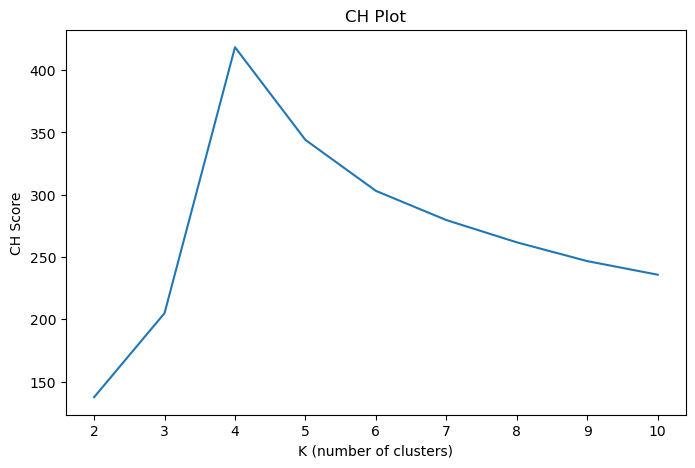

In [23]:
#fitting data to find kMeans
df3[['X1_T', 'X2_T', 'X3_T']] = scaler.fit_transform(df3[['X1', 'X2', 'X3']])
optimize_k_means(df3[['X1_T', 'X2_T', 'X3_T']], 11)

Looking at the Elbow plot we can see K=4. This can be verified from Silhouette score and CH score plots because their peaks also occurs at k=4.

After k=4 plots flattens out. So, we will choose k=4.

##### Creating KMean Model and plotting the data points for each dataset and color them according to the class allocated by each clustering algorithm

In [24]:
# Create and fit the K-means model
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df3[['X1_T', 'X2_T', 'X3_T']])

# Get cluster labels
df3['kmeans_4'] = kmeans.labels_
df3['kmeans_4'] = df3['kmeans_4'].astype(str)

#displaying data
print(df3)

# Visualize the clusters
fig = px.scatter_3d(df3, x='X1_T', y='X2_T', z='X3_T', color='kmeans_4')
fig.show()

# Print the SSE
print('SSE Data3: '+ str(kmeans.inertia_))

     Unnamed: 0        X1        X2        X3  Class      X1_T      X2_T  \
0             1  1.295428  0.050829 -0.385217      1  1.321572  0.130595   
1             2  1.409178 -0.035191 -0.251980      1  1.449107  0.033830   
2             3  1.096803  0.246365 -0.415011      1  1.098876  0.350555   
3             4  1.463328  0.265354 -0.513488      1  1.509820  0.371916   
4             5  1.603284  0.080577 -0.470257      1  1.666736  0.164059   
..          ...       ...       ...       ...    ...       ...       ...   
395         396  0.795695  0.209456  1.880609      4  0.761278  0.309036   
396         397  0.653127 -0.703156  1.549448      4  0.601432 -0.717569   
397         398 -0.726249 -0.103244  0.694300      4 -0.945107 -0.042723   
398         399  0.808596 -0.492640  1.649370      4  0.775742 -0.480758   
399         400  0.749291 -0.447840  0.863555      4  0.709250 -0.430362   

         X3_T kmeans_4  
0   -0.456249        0  
1   -0.307459        0  
2   -0.48952

SSE Data3: 287.7628632230353


##### Evaluating the performance of the clustering algorithm using external validation metrics

In [25]:
#Calculating the external validation metrics ari,nmi & fmi scores
ari_score = adjusted_rand_score(df3['Class'], df3['kmeans_4'])
nmi_score = normalized_mutual_info_score(df3['Class'], df3['kmeans_4'])
fmi_score = fowlkes_mallows_score(df3['Class'], df3['kmeans_4'])

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score}")

Adjusted Rand Index (ARI): 1.0
Normalized Mutual Information (NMI): 1.0
Fowlkes-Mallows Index (FMI): 1.0


# Hierarchical Clustering

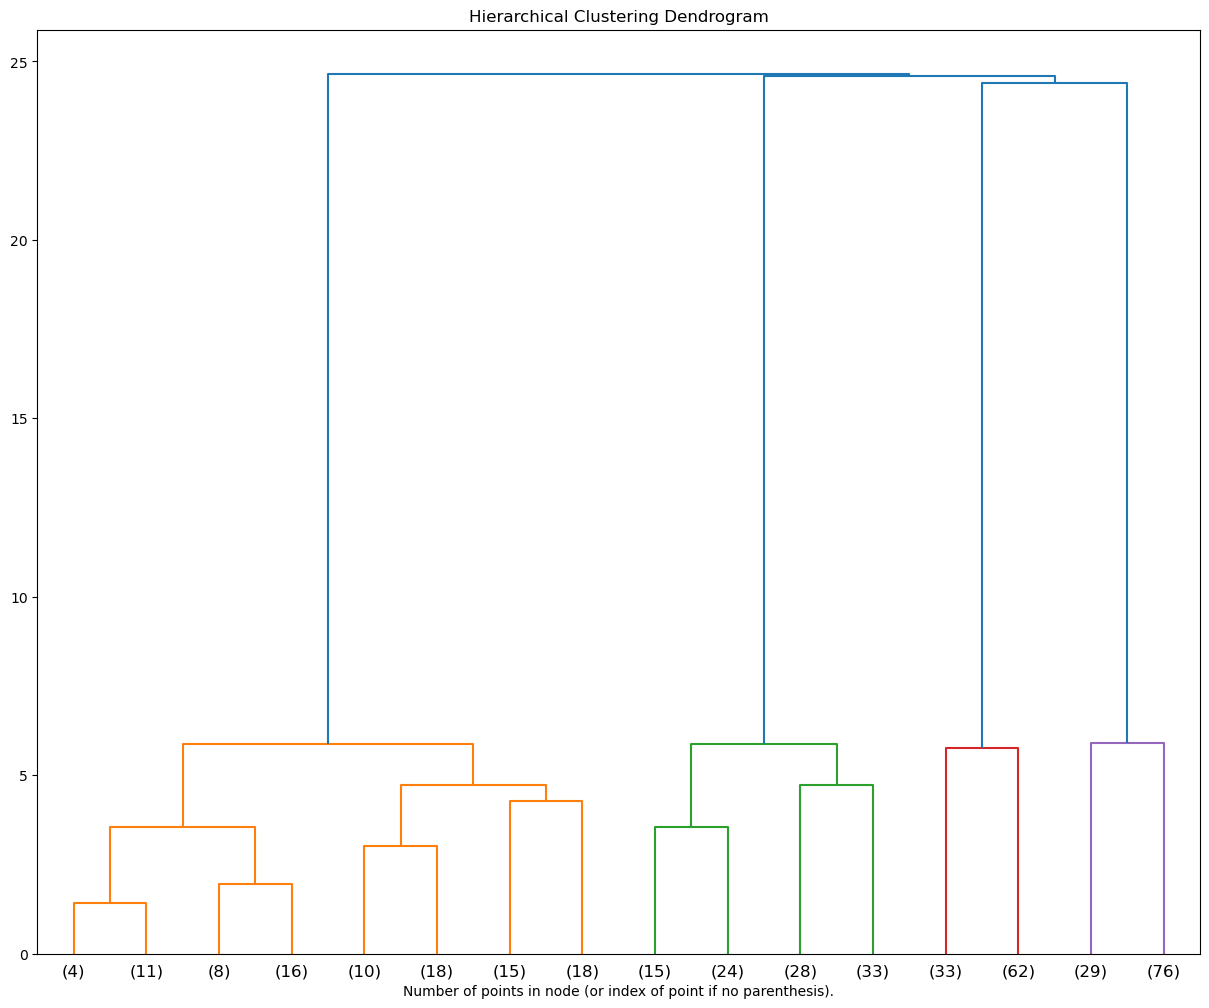

In [26]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)


model = model.fit(df3[['X1_T', 'X2_T', 'X3_T']])
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

we can see a huge decrease in the distance metric when going from cluster 1 to 4. In this data for Hirerarchical clustering we are setting the cluster number to 4.

##### Creating Hierarchical Model and plotting the data points for each dataset and color them according to the class allocated by each clustering algorithm

In [27]:

# Create and fit the hierarchical clustering model
hierarchical_data_3 = AgglomerativeClustering(n_clusters=4)

# Get cluster labels
df3['Cluster_hierarchical'] = hierarchical_data_3.fit_predict(df3[['X1_T', 'X2_T', 'X3_T']])
df3['Cluster_hierarchical'] = df3['Cluster_hierarchical'].astype(str)

print(df3)

# Visualizing the clusters
fig = px.scatter_3d(df3, x='X1_T', y='X2_T', z='X3_T', color='Cluster_hierarchical')
fig.update_layout(title='Data 3 Cluster Hierarchical')
fig.show()


     Unnamed: 0        X1        X2        X3  Class      X1_T      X2_T  \
0             1  1.295428  0.050829 -0.385217      1  1.321572  0.130595   
1             2  1.409178 -0.035191 -0.251980      1  1.449107  0.033830   
2             3  1.096803  0.246365 -0.415011      1  1.098876  0.350555   
3             4  1.463328  0.265354 -0.513488      1  1.509820  0.371916   
4             5  1.603284  0.080577 -0.470257      1  1.666736  0.164059   
..          ...       ...       ...       ...    ...       ...       ...   
395         396  0.795695  0.209456  1.880609      4  0.761278  0.309036   
396         397  0.653127 -0.703156  1.549448      4  0.601432 -0.717569   
397         398 -0.726249 -0.103244  0.694300      4 -0.945107 -0.042723   
398         399  0.808596 -0.492640  1.649370      4  0.775742 -0.480758   
399         400  0.749291 -0.447840  0.863555      4  0.709250 -0.430362   

         X3_T kmeans_4 Cluster_hierarchical  
0   -0.456249        0                   

##### Evaluating the performance of the clustering algorithm using external validation metrics

In [28]:
#Calculating the external validation metrics ari,nmi & fmi scores
ari_score = adjusted_rand_score(df3['Class'], df3['Cluster_hierarchical'])
nmi_score = normalized_mutual_info_score(df3['Class'], df3['Cluster_hierarchical'])
fmi_score = fowlkes_mallows_score(df3['Class'], df3['Cluster_hierarchical'])

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score}")


Adjusted Rand Index (ARI): 0.9672676330087653
Normalized Mutual Information (NMI): 0.9639667391957355
Fowlkes-Mallows Index (FMI): 0.9753945158961902


# CONCLUSION DATA 3 :

##### KMeans
Adjusted Rand Index (ARI): 1.0

Normalized Mutual Information (NMI): 1.0

Fowlkes-Mallows Index (FMI): 1.0

##### Hierarchical Clustering
Adjusted Rand Index (ARI): 0.9672676330087653

Normalized Mutual Information (NMI): 0.9639667391957355

Fowlkes-Mallows Index (FMI): 0.9753945158961902

According to the external validation metrics scores, we can conclude that KMeans clustering is slightly better than Hierarchical Clustering. KMeans clustering fit the model completely as all the validation metric scores are 1.

# Data4 analysis

##### Plotting  the data points for  dataset and colored them according to the original class

In [29]:
#Plotting a 3D scatter plot
fig = px.scatter_3d(df4, x='X', y='Y', z='C', color='Class')
fig.show()

# KMeans

##### For Data4 plotting Elbow, Silhouette score and CH score plots to find K

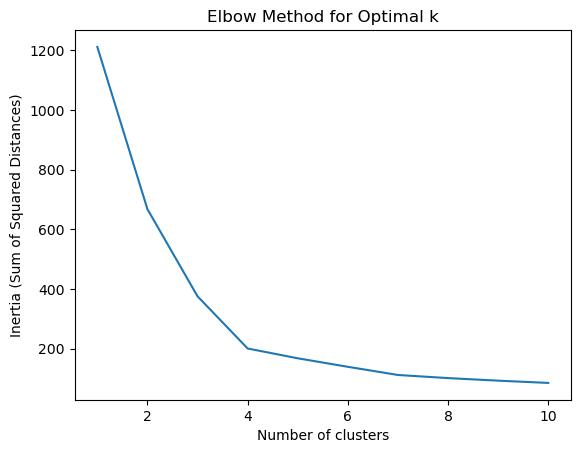

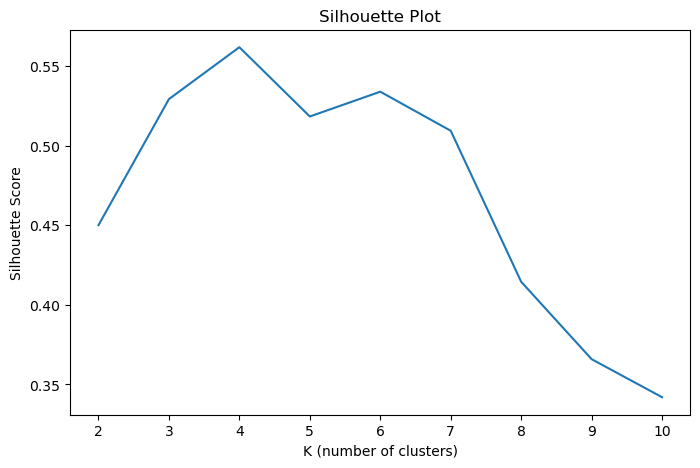

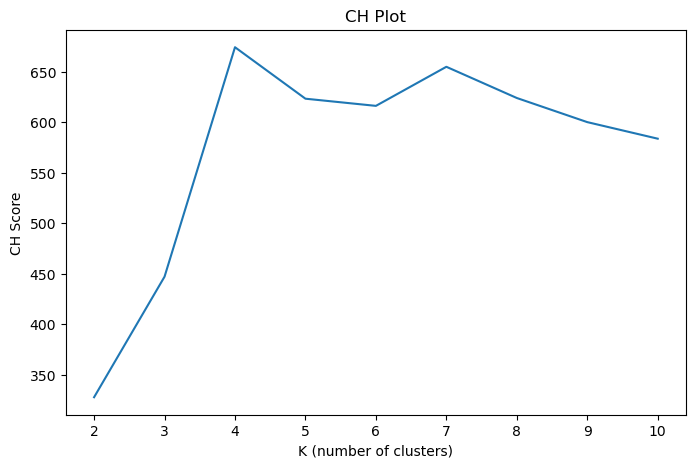

In [30]:
#fitting data to find kMeans
df4[['X1_T', 'X2_T', 'X3_T']] = scaler.fit_transform(df4[['X', 'Y', 'C']])
optimize_k_means(df4[['X1_T', 'X2_T', 'X3_T']], 11)

Looking at the Elbow plot we can see K=4. This can be verified from Silhouette score and CH score plot as their higher peaks is at K=4.

Plot flattens out after k = 4 in elbow plot. So, we will choose k=4.

##### Creating KMean Model and plotting the data points for each dataset and color them according to the class allocated by each clustering algorithm

In [31]:
#fitting the model
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df4[['X1_T', 'X2_T', 'X3_T']])

# Get cluster labels
df4['kmeans_4'] = kmeans.labels_
df4['kmeans_4'] = df4['kmeans_4'].astype(str)

#displaying the data
print(df4)

# Visualize the clusters
fig = px.scatter_3d(df4, x='X1_T', y='X2_T', z='X3_T', color='kmeans_4')
fig.show()

# Print the SSE
print('SSE Data4: '+ str(kmeans.inertia_))

    Unnamed: 0         X         Y         C  Class      X1_T      X2_T  \
0           X1  3.277701  0.814082  0.326574      1  1.220139 -0.671883   
1           X2  0.387577  0.176780  0.888046      1 -1.403171 -1.101525   
2           X3  0.268546  0.582963  0.080981      1 -1.511213 -0.827694   
3           X4  2.031145  0.244597  0.643921      1  0.088664 -1.055806   
4           X5  0.188677  0.461280  0.496633      1 -1.583708 -0.909727   
..         ...       ...       ...       ...    ...       ...       ...   
399       X400  3.248655  2.297291  3.388138      3  1.193774  0.328033   
400          X  4.100000  5.100000  0.504558      4  1.966523  2.217501   
401        X.1  3.900000  4.900000  0.941634      4  1.784987  2.082669   
402        X.2  4.000000  5.000000  0.702123      4  1.875755  2.150085   
403        X.3  4.100000  5.100000  0.887645      4  1.966523  2.217501   

         X3_T kmeans_4  
0   -0.889444        1  
1   -0.263719        3  
2   -1.163142        3  

SSE Data4: 200.10804672979515


##### Evaluating the performance of the clustering algorithm using external validation metrics

In [32]:
#Calculating the external validation metrics ari,nmi & fmi scores
ari_score = adjusted_rand_score(df4['Class'], df4['kmeans_4'])
nmi_score = normalized_mutual_info_score(df4['Class'], df4['kmeans_4'])
fmi_score = fowlkes_mallows_score(df4['Class'], df4['kmeans_4'])

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score}")

Adjusted Rand Index (ARI): 0.5993134588235806
Normalized Mutual Information (NMI): 0.7338720406648769
Fowlkes-Mallows Index (FMI): 0.7318067716620308


# Hierarchical Clustering

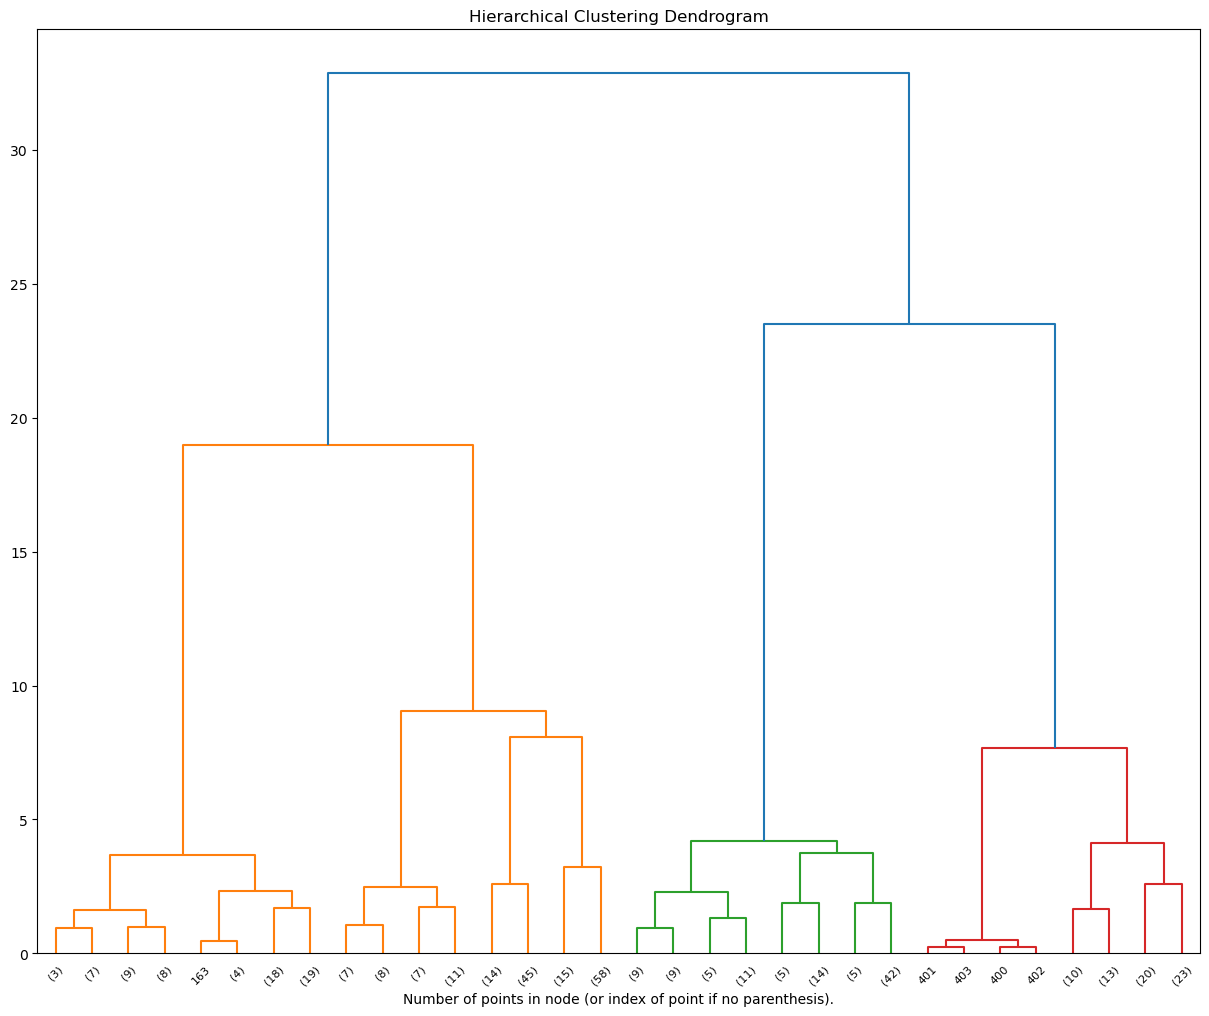

In [33]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)


model = model.fit(df4[['X1_T', 'X2_T', 'X3_T']])
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")

# plot the top four levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

We can see a huge decrease in the distance metric when going from cluster 1 to 5. 
In this data for Hirerarchical clustering we are setting the cluster number to 5.

##### Creating Hierarchical Model and plotting the data points for each dataset and color them according to the class allocated by each clustering algorithm

In [34]:

# Create and fit the hierarchical clustering model
hierarchical_data_4 = AgglomerativeClustering(n_clusters=5)

# Get cluster labels
df4['Cluster_hierarchical'] = hierarchical_data_4.fit_predict(df4[['X1_T', 'X2_T', 'X3_T']])
df4['Cluster_hierarchical'] = df4['Cluster_hierarchical'].astype(str)

print(df4)

# Visualizing the clusters
fig = px.scatter_3d(df4, x='X1_T', y='X2_T', z='X3_T', color='Cluster_hierarchical')
fig.update_layout(title='Data 4 Cluster Hierarchical')
fig.show()

    Unnamed: 0         X         Y         C  Class      X1_T      X2_T  \
0           X1  3.277701  0.814082  0.326574      1  1.220139 -0.671883   
1           X2  0.387577  0.176780  0.888046      1 -1.403171 -1.101525   
2           X3  0.268546  0.582963  0.080981      1 -1.511213 -0.827694   
3           X4  2.031145  0.244597  0.643921      1  0.088664 -1.055806   
4           X5  0.188677  0.461280  0.496633      1 -1.583708 -0.909727   
..         ...       ...       ...       ...    ...       ...       ...   
399       X400  3.248655  2.297291  3.388138      3  1.193774  0.328033   
400          X  4.100000  5.100000  0.504558      4  1.966523  2.217501   
401        X.1  3.900000  4.900000  0.941634      4  1.784987  2.082669   
402        X.2  4.000000  5.000000  0.702123      4  1.875755  2.150085   
403        X.3  4.100000  5.100000  0.887645      4  1.966523  2.217501   

         X3_T kmeans_4 Cluster_hierarchical  
0   -0.889444        1                    3  
1   -0.

##### Evaluating the performance of the clustering algorithm using external validation metrics

In [35]:
#Calculating the external validation metrics ari,nmi & fmi scores
ari_score = adjusted_rand_score(df4['Class'], df4['Cluster_hierarchical'])
nmi_score = normalized_mutual_info_score(df4['Class'], df4['Cluster_hierarchical'])
fmi_score = fowlkes_mallows_score(df4['Class'], df4['Cluster_hierarchical'])

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score}")


Adjusted Rand Index (ARI): 0.6640744269195193
Normalized Mutual Information (NMI): 0.7923057533617143
Fowlkes-Mallows Index (FMI): 0.7793392836999045


# CONCLUSION DATA 4 :

##### KMeans
Adjusted Rand Index (ARI): 0.5993134588235806
    
Normalized Mutual Information (NMI): 0.7338720406648768
    
Fowlkes-Mallows Index (FMI): 0.7318067716620308

##### Hierarchical Clustering
Adjusted Rand Index (ARI): 0.6640744269195193

Normalized Mutual Information (NMI): 0.7923057533617143

Fowlkes-Mallows Index (FMI): 0.7793392836999045

According to the external validation metrics scores, we can conclude that Hierarchical clustering is  better than K-Means Clustering.

# Data5 analysis

##### Plotting  the data points for  dataset and colored them according to the original class

In [36]:
#Plotting a 3D scatter plot
fig = px.scatter_3d(df5, x='X1', y='X2', z='X3', color='Class')
fig.show()

# KMeans

##### For Data5 plotting Elbow, Silhouette score and CH score plots to find K

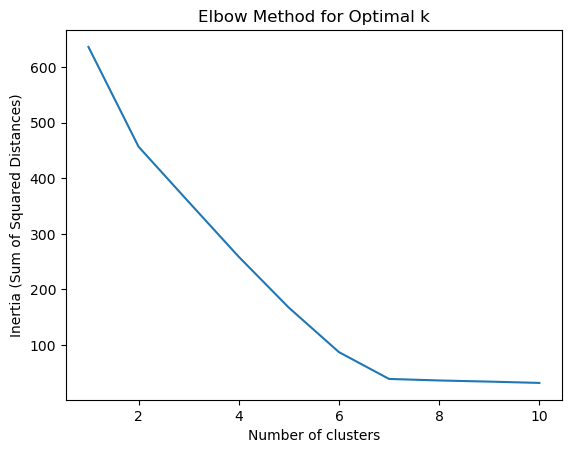

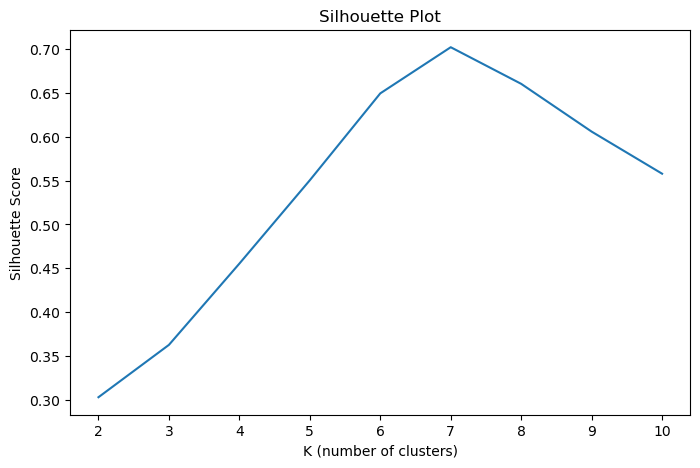

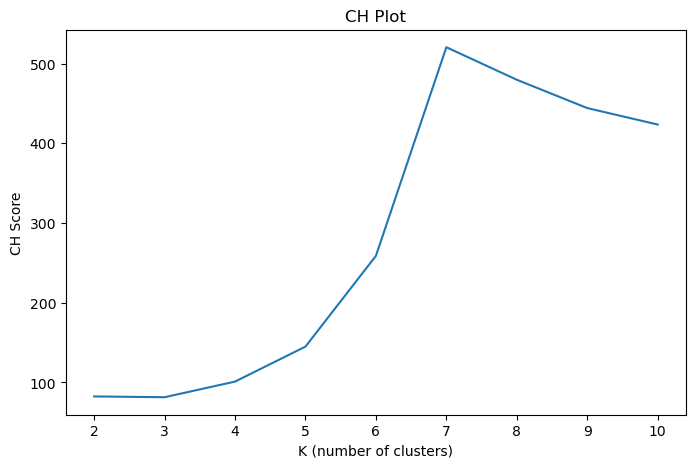

In [37]:
#fitting data to find kMeans
df5[['X1_T', 'X2_T', 'X3_T']] = scaler.fit_transform(df5[['X1', 'X2', 'X3']])
optimize_k_means(df5[['X1_T', 'X2_T', 'X3_T']], 11)

Looking at the Elbow plot we can see K=7. This can be verified from Silhouette score and CH score plots as their peaks also occurs at K=7.

After k=7 plots flattens out. So, we will choose k=7.

##### Creating KMean Model and plotting the data points for each dataset and color them according to the class allocated by each clustering algorithm

In [38]:
#fitting the model
kmeans = KMeans(n_clusters = 7)
kmeans.fit(df5[['X1_T', 'X2_T', 'X3_T']])

# Get cluster labels
df5['kmeans_7'] = kmeans.labels_
df5['kmeans_7'] = df5['kmeans_7'].astype(str)

#displaying the data
print(df5)

# Visualize the clusters
fig = px.scatter_3d(df5, x='X1_T', y='X2_T', z='X3_T', color='kmeans_7')
fig.show()

# Print the SSE
print('SSE Data5: '+ str(kmeans.inertia_))

     Unnamed: 0        X1        X2        X3  Class      X1_T      X2_T  \
0             1 -0.063274  0.027734  0.022683      1 -0.047871 -0.003870   
1             2 -0.000731  0.048211  0.069198      1 -0.009824  0.008417   
2             3 -0.060767 -0.009080  0.053085      1 -0.046346 -0.025960   
3             4  0.013252 -0.011876  0.055324      1 -0.001317 -0.027637   
4             5 -0.054508 -0.003813  0.001738      1 -0.042538 -0.022799   
..          ...       ...       ...       ...    ...       ...       ...   
207         208  0.175738 -0.053478 -2.733752      7  0.097529 -0.052600   
208         209  0.396046 -0.858377 -3.126866      7  0.231550 -0.535570   
209         210 -0.406362 -0.334541 -2.885598      7 -0.256584 -0.221249   
210         211 -0.299275  0.071281 -3.642585      7 -0.191439  0.022260   
211         212 -0.506192  0.433538 -2.608597      7 -0.317315  0.239628   

         X3_T kmeans_7  
0    0.035883        6  
1    0.064508        6  
2    0.05459

SSE Data5: 39.1748098263846


In [39]:
#Calculating the external validation metrics ari,nmi & fmi scores
ari_score = adjusted_rand_score(df5['Class'], df5['kmeans_7'])
nmi_score = normalized_mutual_info_score(df5['Class'], df5['kmeans_7'])
fmi_score = fowlkes_mallows_score(df5['Class'], df5['kmeans_7'])

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score}")

Adjusted Rand Index (ARI): 1.0
Normalized Mutual Information (NMI): 1.0
Fowlkes-Mallows Index (FMI): 1.0


# Hierarchical Clustering

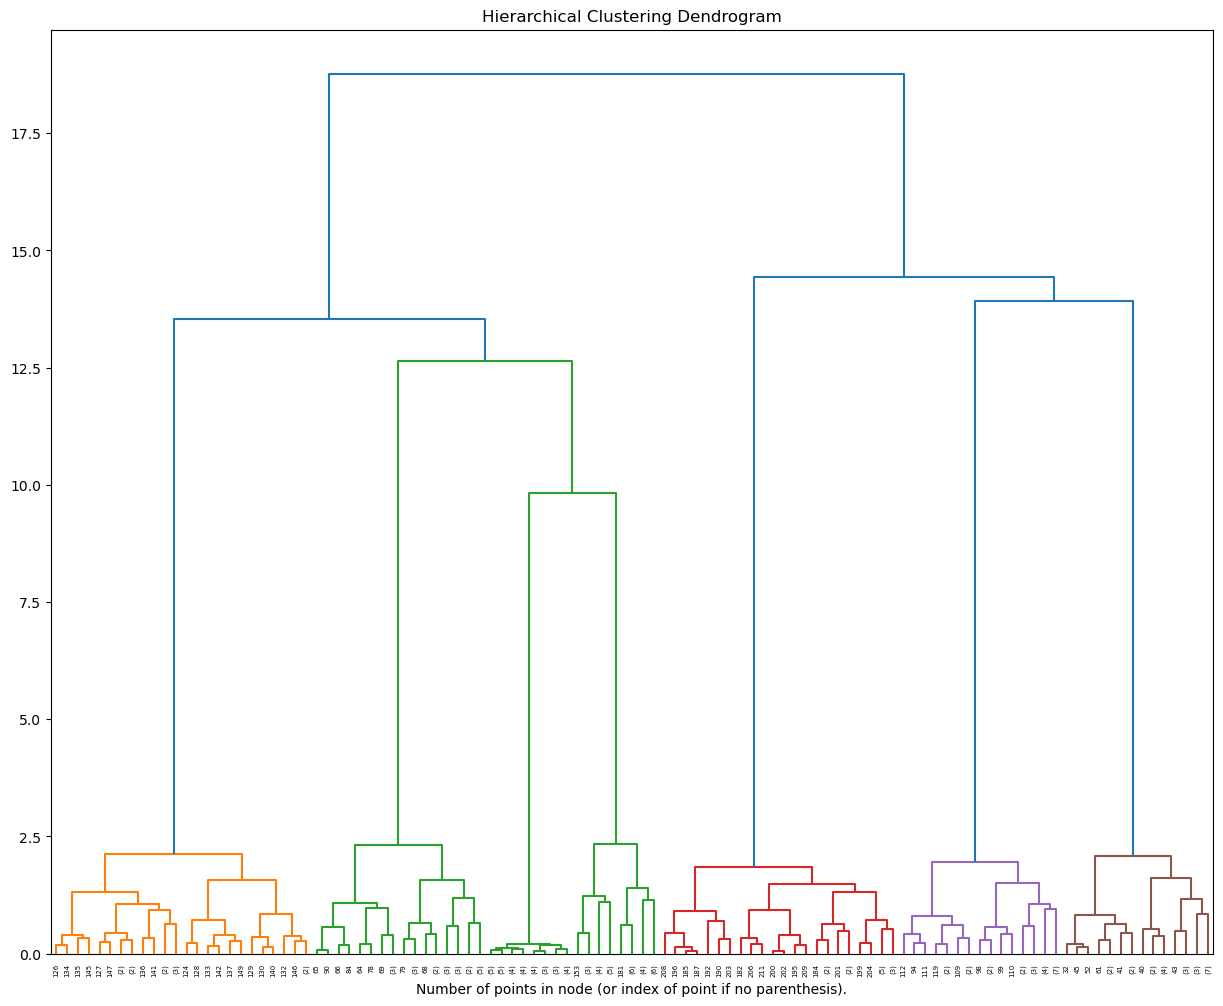

In [40]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)


model = model.fit(df5[['X1_T', 'X2_T', 'X3_T']])
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")

# plot the top Six levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=6)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

We can see a huge decrease in the distance metric when going from cluster 1 to 7. In this data for Hirerarchical clustering we are setting the cluster number to 7.

##### Creating Hierarchical Model and plotting the data points for each dataset and color them according to the class allocated by each clustering algorithm

In [41]:


# Create and fit the hierarchical clustering model
hierarchical_data_5 = AgglomerativeClustering(n_clusters=7)

# Get cluster labels
df5['Cluster_hierarchical'] = hierarchical_data_5.fit_predict(df5[['X1_T', 'X2_T', 'X3_T']])
df5['Cluster_hierarchical'] = df5['Cluster_hierarchical'].astype(str)

print(df5)

# Visualizing the clusters
fig = px.scatter_3d(df5, x='X1_T', y='X2_T', z='X3_T', color='Cluster_hierarchical')
fig.update_layout(title='Data 5 Cluster Hierarchical')
fig.show()

     Unnamed: 0        X1        X2        X3  Class      X1_T      X2_T  \
0             1 -0.063274  0.027734  0.022683      1 -0.047871 -0.003870   
1             2 -0.000731  0.048211  0.069198      1 -0.009824  0.008417   
2             3 -0.060767 -0.009080  0.053085      1 -0.046346 -0.025960   
3             4  0.013252 -0.011876  0.055324      1 -0.001317 -0.027637   
4             5 -0.054508 -0.003813  0.001738      1 -0.042538 -0.022799   
..          ...       ...       ...       ...    ...       ...       ...   
207         208  0.175738 -0.053478 -2.733752      7  0.097529 -0.052600   
208         209  0.396046 -0.858377 -3.126866      7  0.231550 -0.535570   
209         210 -0.406362 -0.334541 -2.885598      7 -0.256584 -0.221249   
210         211 -0.299275  0.071281 -3.642585      7 -0.191439  0.022260   
211         212 -0.506192  0.433538 -2.608597      7 -0.317315  0.239628   

         X3_T kmeans_7 Cluster_hierarchical  
0    0.035883        6                   

In [42]:
#Calculating the external validation metrics ari,nmi & fmi scores
ari_score = adjusted_rand_score(df5['Class'], df5['Cluster_hierarchical'])
nmi_score = normalized_mutual_info_score(df5['Class'], df5['Cluster_hierarchical'])
fmi_score = fowlkes_mallows_score(df5['Class'], df5['Cluster_hierarchical'])

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score}")

Adjusted Rand Index (ARI): 1.0
Normalized Mutual Information (NMI): 1.0
Fowlkes-Mallows Index (FMI): 1.0


# CONCLUSION DATA 5 :

##### KMeans
Adjusted Rand Index (ARI): 1.0

Normalized Mutual Information (NMI): 1.0

Fowlkes-Mallows Index (FMI): 1.0

##### Hierarchical Clustering
Adjusted Rand Index (ARI): 1.0

Normalized Mutual Information (NMI): 1.0

Fowlkes-Mallows Index (FMI): 1.0

According to the external validation metrics scores, we can conclude that KMeans clustering and Hierarchical Clustering both are best suitable for clustering. for both of them validation metric values are 1.

## Task 2: The world indicators dataset compares different countries based on selected attributes. Do the following tasks using the “WorldIndicators.csv” dataset posted with the project:

In [43]:
f6 = r'/Users/gauravnathani/Downloads/World Indicators.csv'
df6 = pd.read_csv(f6, low_memory=False)

In [44]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

### Data Cleaning

In [45]:
# For Business Tax Rate column
df6['Business Tax Rate']=df6['Business Tax Rate'].astype(str)
df6['Business Tax Rate']=df6['Business Tax Rate'].str.replace('%','')
df6['Business Tax Rate']=df6['Business Tax Rate'].astype(float)/100
#.replace('%', '').astype(float)/100

# For GDP column
df6['GDP']=df6['GDP'].str.replace('$', '')
df6['GDP']=df6['GDP'].str.replace(',', '').astype(float)

# For Health Exp/Capitacolumn
df6['Health Exp/Capita']=df6['Health Exp/Capita'].str.replace('$', '')
df6['Health Exp/Capita']=df6['Health Exp/Capita'].str.replace(',', '').astype(float)

In [46]:
#filling missing values with mean
df6.fillna(df6.mean(), inplace=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              208 non-null    float64
 1   Business Tax Rate       208 non-null    float64
 2   Days to Start Business  208 non-null    float64
 3   Energy Usage            208 non-null    float64
 4   GDP                     208 non-null    float64
 5   Health Exp % GDP        208 non-null    float64
 6   Health Exp/Capita       208 non-null    float64
 7   Hours to do Tax         208 non-null    float64
 8   Infant Mortality Rate   208 non-null    float64
 9   Internet Usage          208 non-null    float64
 10  Lending Interest        208 non-null    float64
 11  Life Expectancy Female  208 non-null    float64
 12  Life Expectancy Male    208 non-null    float64
 13  Mobile Phone Usage      208 non-null    float64
 14  Population 0-14         208 non-null    fl

In [47]:
#picking numeric values from dataset
numeric_columns = df6.select_dtypes(include=['number']).columns

### Principal component analysis (PCA)

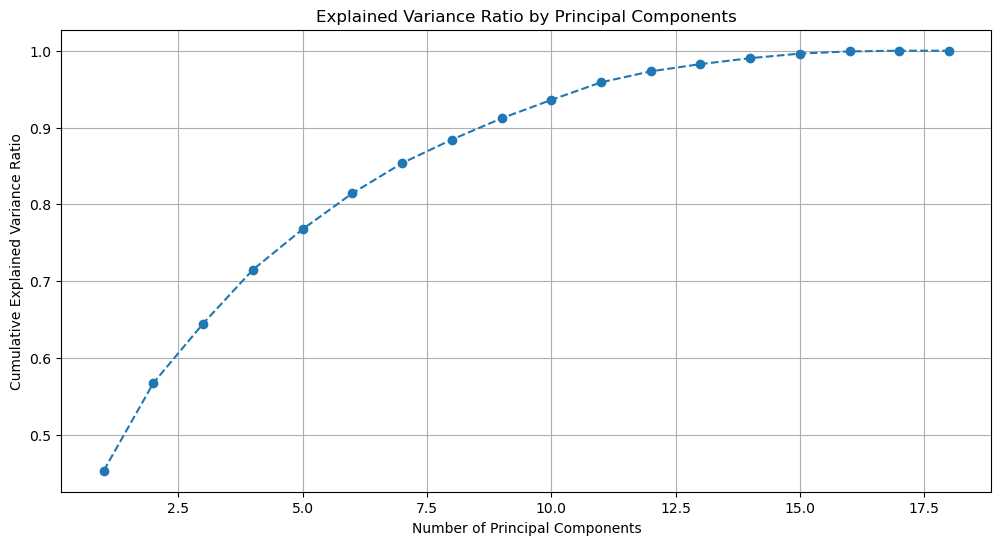

In [48]:
# Assuming df6 is your DataFrame
columns_for_pca = df6.drop(['Region', 'Country'], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_for_pca)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Plot explained variance ratio
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

The plot is a scree plot which is a graphical representation of the explained variance of each principal component in the analysis. It is used to determine the number of principal components to keep in the analysis. The plot shows the cumulative explained variance ratio by principal components. The x-axis represents the number of principal components and the y-axis represents the cumulative explained variance ratio. The plot shows that the explained variance ratio increases rapidly with the first few principal components and then levels off. This indicates that the first few principal components are the most important for explaining the variance in the data.

In [49]:
# Add PCA results to the DataFrame
df6['PC1'] = pca_result[:, 0]
df6['PC2'] = pca_result[:, 1]

num_components = 15  # Based on the plot
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_data)

# Map Region to numerical labels
region_mapping = {region: i for i, region in enumerate(df6['Region'].unique())}
df6['Region_Label'] = df6['Region'].map(region_mapping)

In [50]:
# Visualize PCA results
fig_pca = go.Figure(data=go.Scatter(
    x=df6['PC1'],
    y=df6['PC2'],
    mode='markers',
    marker=dict(color=df6['Region_Label'], showscale=True),
    text=df6['Country']
))
fig_pca.update_layout(title='PCA: Scatter Plot of PC1 vs. PC2 Color by Region')
fig_pca.show()

The World Indicators dataset's scatter plot on PCA axes does not provide useful information about the underlying structure of the data. Overlapping clusters that represent common trends in socioeconomic indicators among nations within the same geographic areas are created when the points are coloured according to regions. We were able to extract more insights from the dataset by implementing clustering techniques.

### Task 2.1 Use K-means and hierarchical clustering methods to group similar countries together

#### K-Means Clustering

In [51]:
#defining common function to get Kmeans and plot Elbow, Silhouette Score and CH Score
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    silhouettes = []
    ch_coeffs = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        if k > 1:
            silhouettes.append(metrics.silhouette_score(data, kmeans.labels_))
            ch_coeffs.append(metrics.calinski_harabasz_score(data, kmeans.labels_))
        means.append(k)
        inertias.append(kmeans.inertia_)

 
    plt.plot(means, inertias)
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.show()
    plt.figure(figsize=(8,5))
    plt.plot(range(2,11), silhouettes)
    plt.xlabel("K (number of clusters)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Plot")
    plt.show()
    plt.figure(figsize=(8,5))
    plt.plot(range(2,11), ch_coeffs)
    plt.xlabel("K (number of clusters)")
    plt.ylabel("CH Score")
    plt.title("CH Plot")
    plt.show()

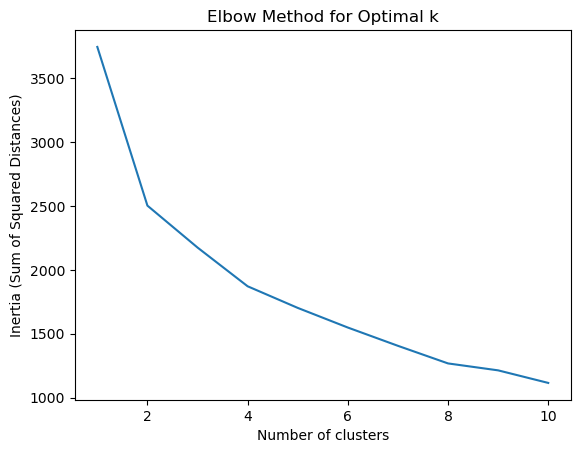

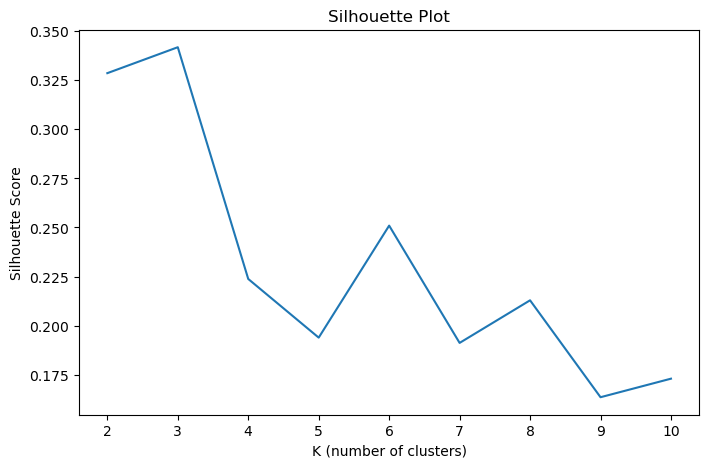

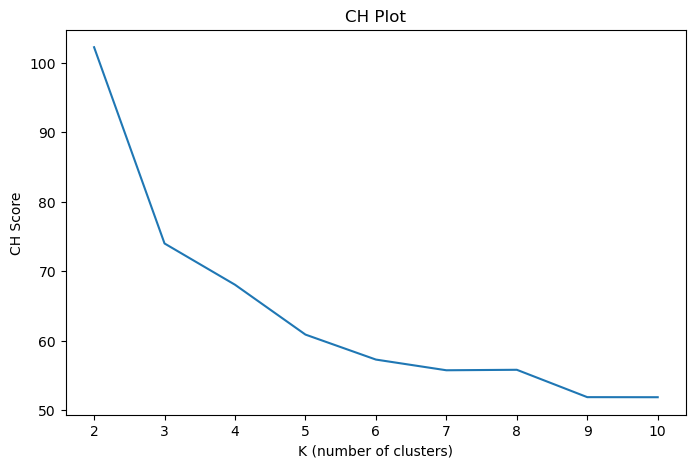

In [52]:
#fitting data to find kMeans
df6[['Birth Rate', 'Business Tax Rate', 'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Urban']] = scaler.fit_transform(df6[['Birth Rate', 'Business Tax Rate', 'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Urban']])
optimize_k_means(df6[['Birth Rate', 'Business Tax Rate', 'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Urban']], 11)

Looking at our elbow plot, we can observe that after K=4, the plot flattens out substantially. 
Silhouette score and CH score plots does not align with elbow plots.

We are going with elbow plot, we should probably choose K=4.



In [53]:
numeric_columns = df6.select_dtypes(include=['number']).columns
kmeans = KMeans(n_clusters = 4)
kmeans_labels=kmeans.fit_predict(df6[numeric_columns])
df6['kmeans_labels'] = kmeans.labels_

In [54]:
fig_kmeans = go.Figure()

for label in df6['kmeans_labels'].unique():
    cluster_data = df6[df6['kmeans_labels'] == label]
    fig_kmeans.add_trace(go.Scatter(
        x=cluster_data['PC1'],
        y=cluster_data['PC2'],
        mode='markers',
        marker=dict(color=label),
        text=cluster_data['Country'],
        legendgroup=str(label),
        name=f'Cluster {label}'
    ))

fig_kmeans.update_layout(title='K-means Clustering: Scatter Plot of PC1 vs. PC2')
fig_kmeans.show()

Upon applying K-means clustering to the dataset, the resulting clusters exhibit are non-cohesive, indicating distinct and independent groupings. This observation underscores the effectiveness of the clustering algorithm in creating well-defined boundaries between data points, facilitating a clear interpretation of the identified patterns. The minimal overlap between clusters signifies a robust separation of data, reinforcing the reliability of the clustering outcomes in capturing inherent structures within the dataset.

In [55]:
clusters_name = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}
df6['kmeans_labels'] = df6['kmeans_labels'].map(clusters_name)

fig = px.choropleth(df6,
                    locationmode='country names',
                    locations='Country',
                    color='kmeans_labels',
                    title='Coutries by labels'
                   )
fig.show()

Predominantly, countries are assigned to cluster 2, while only a few are categorized into cluster 3. Notably, the distribution of cluster 3 countries appears more scattered, indicating a broader dispersion of characteristics within this cluster.

#### Hierarchical Clustering

In [56]:
# Creating a Function
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

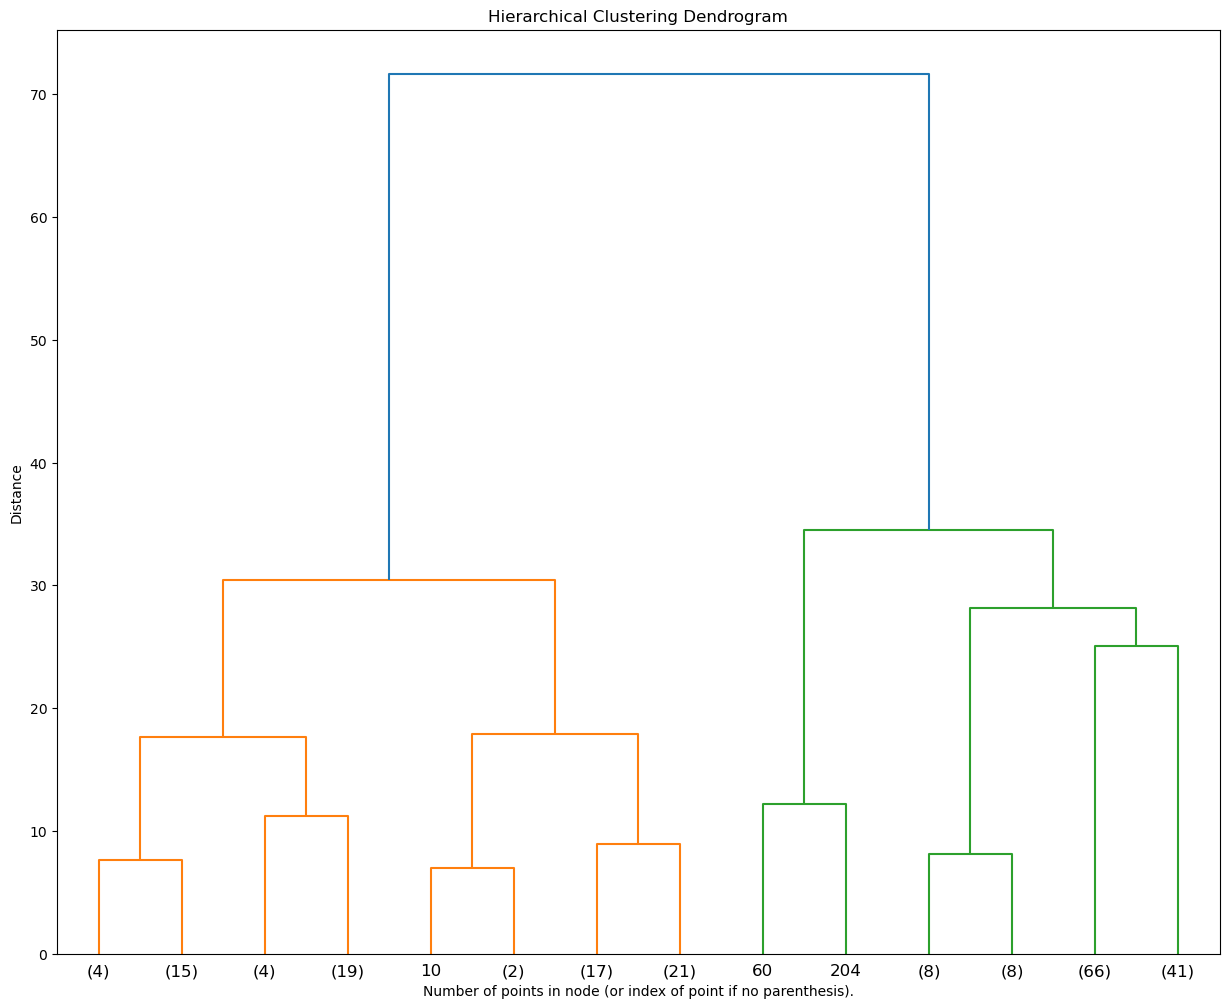

In [57]:
numeric_columns = df6.select_dtypes(include=['number']).columns

# Setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df6[numeric_columns])
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")

# Plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel('Distance')
plt.show()

We can see distance between metric decreasing as we go from cluster 1 to 4. Our number of clusters should be 4

In [58]:
hierarchical_data = AgglomerativeClustering(n_clusters=4)
df6['hierarchical_labels'] = hierarchical_data.fit_predict(df6[numeric_columns])
hierarchical_labels=kmeans.fit_predict(df6[numeric_columns])

In [59]:
fig_kmeans = go.Figure()

for label in df6['hierarchical_labels'].unique():
    cluster_data = df6[df6['hierarchical_labels'] == label]
    fig_kmeans.add_trace(go.Scatter(
        x=cluster_data['PC1'],
        y=cluster_data['PC2'],
        mode='markers',
        marker=dict(color=label),
        text=cluster_data['Country'],
        legendgroup=str(label),
        name=f'Cluster {label}'
    ))

fig_kmeans.update_layout(title='Hierarchical Clustering: Scatter Plot of PC1 vs. PC2')
fig_kmeans.show()

Upon applying hierarchical clustering to the dataset, the formed clusters exhibit a subtle degree of overlap, indicating a nuanced and interconnected structure among adjacent groups. This suggests that some data points share common characteristics that transcend rigid cluster boundaries, reflecting a more intricate relationship between elements in the dataset. The slight overlap in clusters unveils a hierarchical organization, allowing for a more flexible and dynamic representation of underlying patterns, capturing the complexity of relationships within the data.

In [60]:
clusters_name = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}
df6['hierarchical_labels'] = df6['hierarchical_labels'].map(clusters_name)
 
fig = px.choropleth(df6,
                    locationmode='country names',
                    locations='Country',
                    color='hierarchical_labels',
                    title='Countries by labels'
                   )
fig.show()

The majority of countries are grouped into cluster 0, with a notable scarcity in cluster 2. Specifically, only two countries are classified under cluster 2, suggesting a distinct and less populated subgroup within the clustering results.

### Task 2.2 Use internal validation metrics to report the cluster quality

In [61]:
#Silhouette score
silhouette_avg = silhouette_score(df6[numeric_columns], kmeans_labels)
#Calinski-Harabasz score
ch_index = calinski_harabasz_score(df6[numeric_columns], kmeans_labels)
#Davies Bouldin score
db_index = davies_bouldin_score(df6[numeric_columns], kmeans_labels)

print(f"Silhouette Score for K-means: {silhouette_avg}")
print(f"Calinski-Harabasz Index for K-means: {ch_index}")
print(f"Davies-Bouldin Index for K-means: {db_index}")

Silhouette Score for K-means: 0.2658217625443239
Calinski-Harabasz Index for K-means: 96.63826727654322
Davies-Bouldin Index for K-means: 1.1535036755575852


In [62]:
#Silhouette score
silhouette_avg = silhouette_score(df6[numeric_columns], hierarchical_labels)
#Calinski-Harabasz score
ch_index = calinski_harabasz_score(df6[numeric_columns], hierarchical_labels)
#Davies Bouldin score
db_index = davies_bouldin_score(df6[numeric_columns], hierarchical_labels)

print(f"Silhouette Score for Hierarchical clustering: {silhouette_avg}")
print(f"Calinski-Harabasz Index for Hierarchical clustering: {ch_index}")
print(f"Davies-Bouldin Index for Hierarchical clustering: {db_index}")

Silhouette Score for Hierarchical clustering: 0.2784921443429829
Calinski-Harabasz Index for Hierarchical clustering: 97.02289179092077
Davies-Bouldin Index for Hierarchical clustering: 1.066855774526357


### Task 2.3 Report the best clustering solution. Give a detailed list of all the groups and the countries included within the groups

While the Silhouette and Calinski-Harabasz scores for K-means are marginally better than Hierarchical Clustering, both models exhibit similar overall performance based on these metrics.Additionally, visual inspection of scatter plots suggests that K-means may be preferable, as it demonstrates minimal overlap among clusters compared to Hierarchical Clustering.

The combination of quantitative metrics and visual interpretation implies a slightly superior performance of K-means over Hierarchical Clustering in this particular analysis.

In [63]:
# Group by cluster label and list samples in each cluster
for kmeans_labels, group in df6.groupby('kmeans_labels'):
    print(f"Cluster {kmeans_labels}:")
    print(group.index.tolist())
    original_country_names = df6.loc[group.index, 'Country'].tolist()
    print(original_country_names)
    print("\n")

Cluster Cluster 0:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 70, 76, 77, 81, 83, 147, 158]
['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Lao PDR', 'Nepal', 'Pakistan', 'Tajikistan', 'Timor-Leste', 'Yemen, Rep.', 'Papua New Guinea']


Cluster Cluster 1:
[31, 49, 58, 61, 62, 65, 68, 71, 72, 79, 87, 88, 89, 90, 91, 92, 93, 94, 

In [64]:
for hierarchical_labels, group in df6.groupby('hierarchical_labels'):
    print(f"Cluster {hierarchical_labels}:")
    print(group.index.tolist())
    original_country_names = df6.loc[group.index, 'Country'].tolist()
    print(original_country_names)
    print("\n")

Cluster Cluster 0:
[0, 14, 26, 31, 32, 40, 49, 54, 55, 58, 61, 62, 65, 66, 67, 68, 71, 72, 73, 79, 82, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 146, 148, 149, 151, 152, 156, 157, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 189, 190, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207]
['Algeria', 'Egypt, Arab Rep.', 'Libya', 'Mauritius', 'Morocco', 'Seychelles', 'Tunisia', 'Armenia', 'Azerbaijan', 'Brunei Darussalam', 'Georgia', 'Hong Kong SAR, China', 'Japan', 'Kazakhstan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Macao SAR, China', 'Malaysia', 'Maldives', 'Singapore', 'Thailand', 'Vietnam', 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',

### Task 2.4 Generate 3 different scatter plots of your choice and color the data points according to the group

In [65]:
import plotly.express as px

# Create a new column for K-means labels as strings
df6['kmeans_labels_str'] = df6['kmeans_labels'].astype(str)

# Create the scatter plot with independent discrete legends
fig = px.scatter(df6, x='Life Expectancy Male', y='GDP', color='kmeans_labels_str', 
                 title='Life Expectancy Male vs GDP', labels={'Life Expectancy Male': 'Life Expectancy Male', 'GDP': 'GDP'})

fig.update_layout(width=800, height=500)
fig.show()


Cluster 3 exhibits the highest contribution to GDP, indicating a concentration of countries with substantial economic output. In contrast, Cluster 2 contributes the least to GDP, suggesting a subgroup of countries with relatively lower economic impact within the clustering results. These observations highlight distinct economic characteristics and disparities among the identified clusters.

In [66]:
fig = px.scatter(df6, x='Health Exp % GDP', y='Country', color=df6['kmeans_labels'], 
                 title='Health Exp % GDP vs Country', labels={'Health Exp % GDP': 'Health Exp % GDP', 'Country': 'Country'})
fig.update_layout(width=800, height=500)
fig.show()

Cluster 3 stands out for having the highest Health Expenditure as a percentage of GDP, with notable contributions solely from the USA and China. Cluster 0 encompasses the majority of countries, suggesting a widespread distribution of Health Expenditure percentages within this cluster.
These observations emphasize a concentration of significant contributors in Cluster 3 and a diverse distribution of Health Expenditure values across the majority of countries in Cluster 0.

In [67]:
fig = px.scatter(df6, x='Infant Mortality Rate', y='Birth Rate', color=df6['kmeans_labels'], 
                 title='Infant Mortality Rate vs Birth Rate', labels={'Infant Mortality Rate': 'Infant Mortality Rate', 'Birth Rate': 'Birth Rate'})
fig.update_layout(width=800, height=500)
fig.show()

Cluster 1 exhibits the highest infant mortality rate concerning birth rate, suggesting a subgroup of countries facing relatively higher health challenges. In contrast, Cluster 2 displays the least infant mortality rate in relation to birth rate, indicating a subset with comparatively better health outcomes and lower infant mortality.
These findings underscore distinct health disparities among the identified clusters based on their birth rate and infant mortality rate characteristics.